# Health Behavior Dataset Analysis💡

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
warnings.resetwarnings()

In [19]:
# Read the CSV file
df = pd.read_csv('synthetic_data.csv')

## Data Understanding:

In [20]:
# Display the first few rows
df.head()

,Participant ID,Age,Gender,Education Level,Smoking Status,Alcohol Consumption,Physical Activity,Dietary Habits,Sleep Duration,Stress Level,Healthcare Utilization,Chronic Disease Status
0,775R,59,Male,Master,Occasional Smoker,Occasional,Low,Healthy,6.5,Low,High,Yes
1,281C,25,Female,Bachelor,Occasional Smoker,Regular,Moderate,Moderate,4.5,Moderate,Moderate,No
2,866M,46,Female,Master,Non-Smoker,Occasional,High,Moderate,6.5,High,High,Yes
3,41O,63,Female,Bachelor,Regular Smoker,Occasional,High,Moderate,8.7,Moderate,Low,No
4,815M,44,Female,Bachelor,Regular Smoker,Regular,Moderate,Moderate,8.6,Low,Moderate,Yes


In [21]:
# Get general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Participant ID          1000 non-null   object 
 1   Age                     1000 non-null   int64  
 2   Gender                  1000 non-null   object 
 3   Education Level         1000 non-null   object 
 4   Smoking Status          1000 non-null   object 
 5   Alcohol Consumption     1000 non-null   object 
 6   Physical Activity       1000 non-null   object 
 7   Dietary Habits          1000 non-null   object 
 8   Sleep Duration          1000 non-null   float64
 9   Stress Level            1000 non-null   object 
 10  Healthcare Utilization  1000 non-null   object 
 11  Chronic Disease Status  1000 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 93.9+ KB


In [22]:
# Count the number of unique values in each column
df.nunique()

Participant ID            1000
Age                         66
Gender                       2
Education Level              3
Smoking Status               3
Alcohol Consumption          3
Physical Activity            3
Dietary Habits               3
Sleep Duration              46
Stress Level                 3
Healthcare Utilization       3
Chronic Disease Status       2
dtype: int64

In [23]:
# Summary statistics of numerical columns
df.describe()

,Age,Sleep Duration
count,1000.000000,1000.000000
mean,52.627000,6.874100
std,18.891924,1.325895
min,20.000000,4.500000
25%,37.000000,5.800000
50%,52.000000,6.900000
75%,69.000000,8.000000
max,85.000000,9.000000


In [24]:
# Summary statistics of Categorical columns
df.describe(include='O')

,Participant ID,Gender,Education Level,Smoking Status,Alcohol Consumption,Physical Activity,Dietary Habits,Stress Level,Healthcare Utilization,Chronic Disease Status
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,2,3,3,3,3,3,3,3,2
top,775R,Female,Bachelor,Non-Smoker,Occasional,High,Moderate,Moderate,High,No
freq,1,516,349,336,358,344,340,336,344,511


## Data Cleaning:

In [25]:
# Count the number of missing values in each column
df.isnull().sum()

Participant ID            0
Age                       0
Gender                    0
Education Level           0
Smoking Status            0
Alcohol Consumption       0
Physical Activity         0
Dietary Habits            0
Sleep Duration            0
Stress Level              0
Healthcare Utilization    0
Chronic Disease Status    0
dtype: int64

In [26]:
# Checking for Duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

# Univariate Analysis:
### The purpose of the univariate analysis is to understand the distribution of values for a single variable.

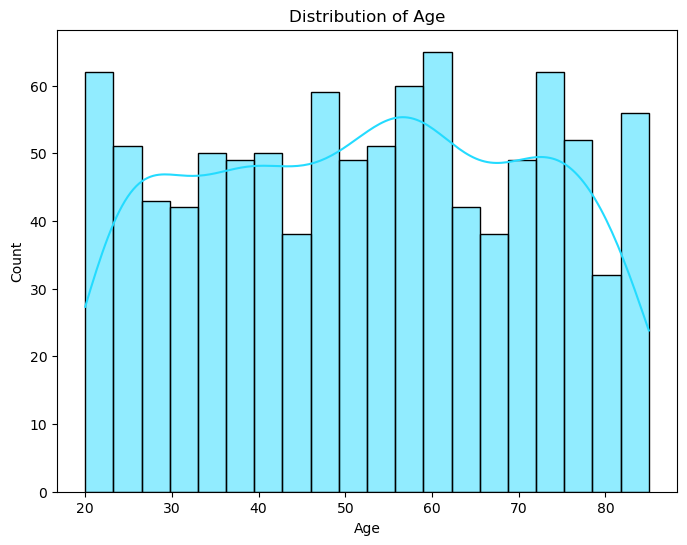

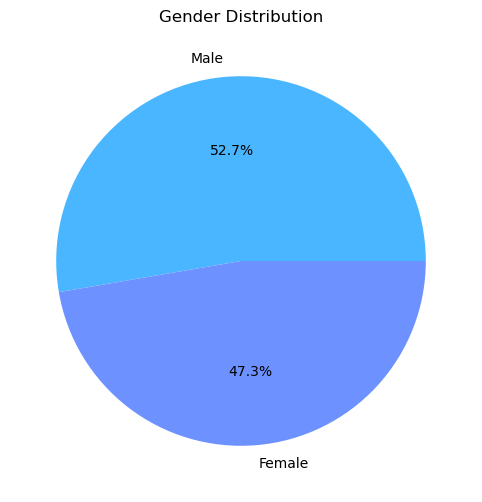

In [97]:
# Age Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color=custom_palette[0])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender Pie chart
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=[custom_palette[1], custom_palette[2]])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Bivariate Analysis:
### The primary purpose is to explore how changes in one variable are associated with changes in another variable.

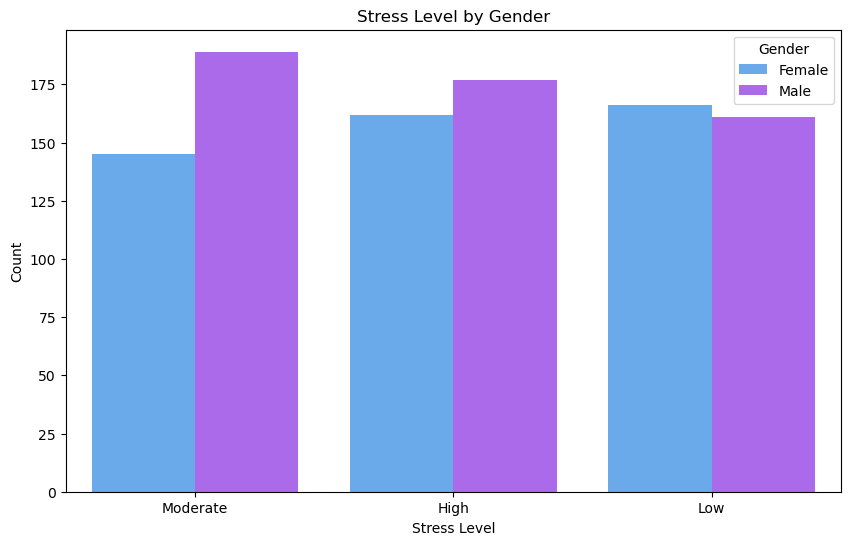

In [98]:
# clustered bar chart 
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress Level', hue='Gender', data=df, palette='cool')
plt.title('Stress Level by Gender')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

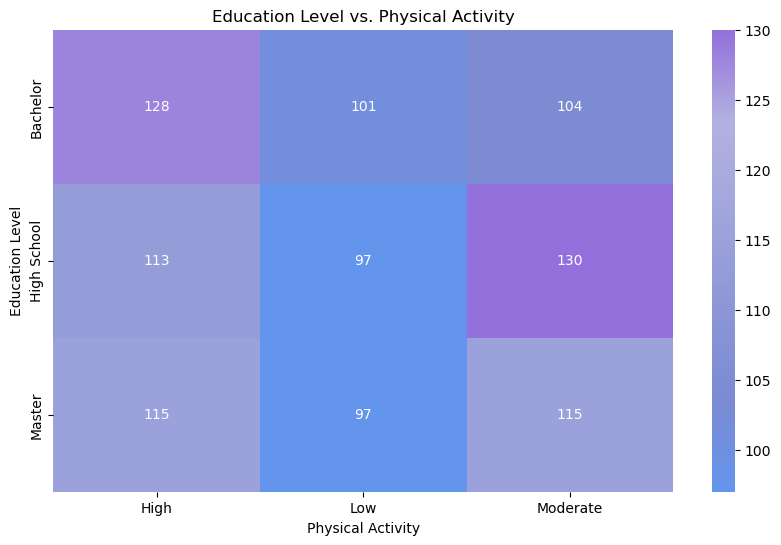

In [104]:
# Define custom colors (slightly darker shades)
dark_blue = '#6495ED'  # Dark Blue
dark_purple = '#9370DB'  # Dark Purple

# Create custom colormap with more gradient steps
colors = [dark_blue, '#7b8ad2', '#8d97d7', '#a0a5db', '#b2b2e0', dark_purple]
cmap_custom = mcolors.LinearSegmentedColormap.from_list("CustomCoolDarker", colors)

# Create a cross-tabulation of Education Level and Physical Activity
education_physical_cross_tab = pd.crosstab(df['Education Level'], df['Physical Activity'])

# Plot the heatmap using the custom colormap
plt.figure(figsize=(10, 6))
sns.heatmap(education_physical_cross_tab, annot=True, cmap=cmap_custom, fmt='d')
plt.title('Education Level vs. Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Education Level')
plt.show()

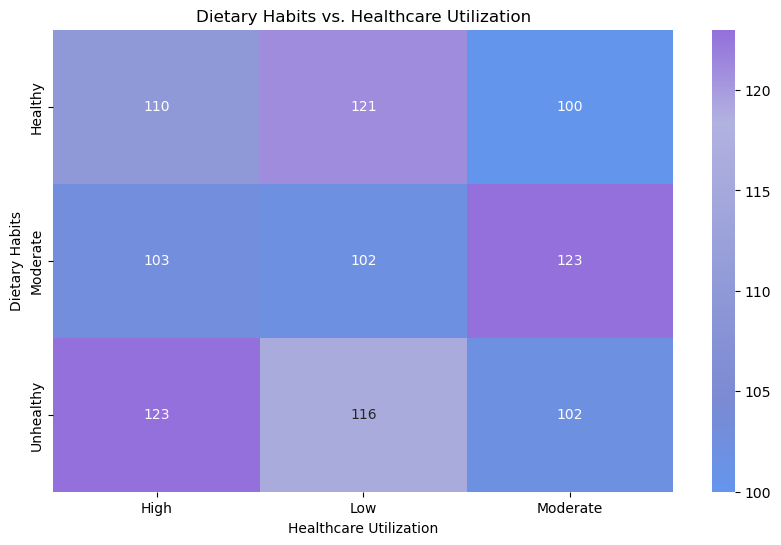

In [100]:
import numpy as np

# Define custom colors (slightly darker shades)
dark_blue = '#6495ED'  # Dark Blue
dark_purple = '#9370DB'  # Dark Purple

# Create custom colormap with more gradient steps
colors = [dark_blue, '#7b8ad2', '#8d97d7', '#a0a5db', '#b2b2e0', dark_purple]
cmap_custom = mcolors.LinearSegmentedColormap.from_list("CustomCoolDarker", colors)

# Create a cross-tabulation of Dietary Habits and Healthcare Utilization
dietary_healthcare_cross_tab = pd.crosstab(df['Dietary Habits'], df['Healthcare Utilization'])

# Plot the heatmap using the custom colormap
plt.figure(figsize=(10, 6))
sns.heatmap(dietary_healthcare_cross_tab, annot=True, cmap=cmap_custom, fmt='d')
plt.title('Dietary Habits vs. Healthcare Utilization')
plt.xlabel('Healthcare Utilization')
plt.ylabel('Dietary Habits')
plt.show()

# Multivariate Analysis:
### The purpose is to understand the complex interactions and patterns among multiple variables in the dataset.

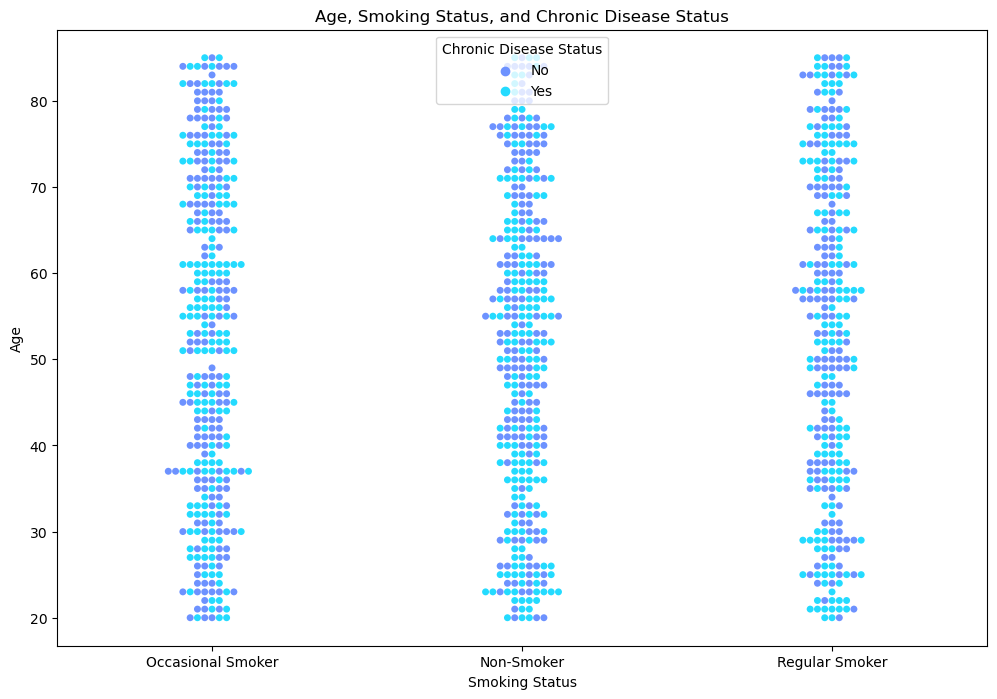

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette based on the "cool" colormap with different colors
custom_palette = sns.color_palette("cool")  # Get the default "cool" colormap

# Manually assign colors for "Yes" and "No"
disease_colors = {"Yes": custom_palette[0], "No": custom_palette[2]}

# Swarm plot for Age, Smoking Status, and Chronic Disease Status using the custom color palette
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Smoking Status', y='Age', hue='Chronic Disease Status', palette=disease_colors, data=df)
plt.title('Age, Smoking Status, and Chronic Disease Status')
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.legend(title='Chronic Disease Status')
plt.show()

C:\Users\NOOF\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


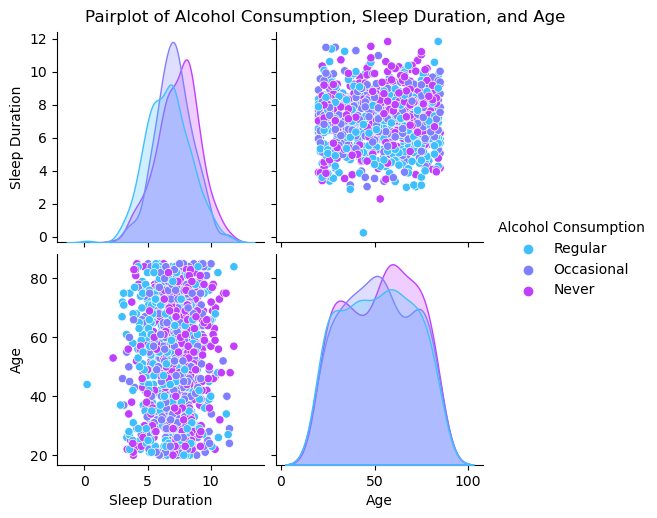

In [102]:
# Pairplot for Alcohol Consumption, Sleep Duration, and Age with Alcohol Consumption
sns.pairplot(df, hue='Alcohol Consumption', vars=['Sleep Duration', 'Age'], palette='cool')
plt.suptitle('Pairplot of Alcohol Consumption, Sleep Duration, and Age', y=1.02)
plt.show()